In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("churn-bigml-20.csv")

In [8]:
X = df.drop(columns=["Churn"])
y = df.Churn
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
def build_and_train_model(dropout_rate=0):
    model = Sequential()
    model.add(Dense(units=6, activation='relu', input_dim=X_train.shape[1]))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(units=6, activation='relu'))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=0)
    return model, history

In [ ]:
model_no_dropout, history_no_dropout = build_and_train_model()
model_dropout, history_dropout = build_and_train_model(0.2)

_, test_acc_no_dropout = model_no_dropout.evaluate(X_test, y_test, verbose=0)
_, test_acc_dropout = model_dropout.evaluate(X_test, y_test, verbose=0)
_, test_loss_no_dropout = model_no_dropout.evaluate(X_test, y_test, verbose=0)
_, test_loss_dropout = model_dropout.evaluate(X_test, y_test, verbose=0)

C:\Users\PRAVEEN ANANTH\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


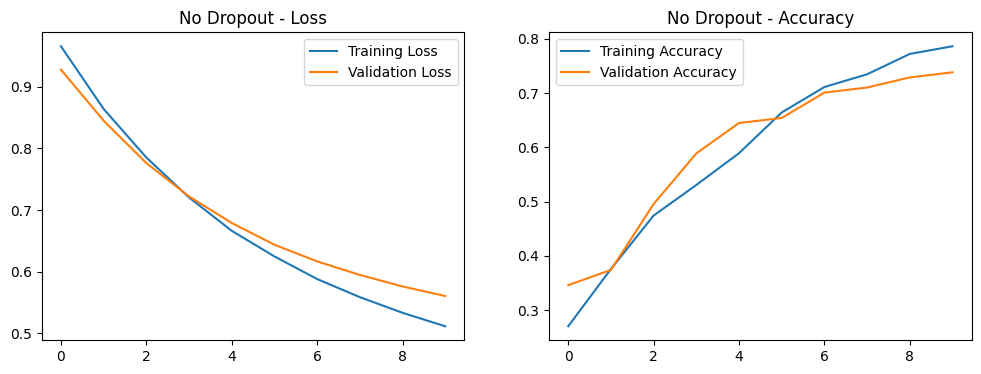

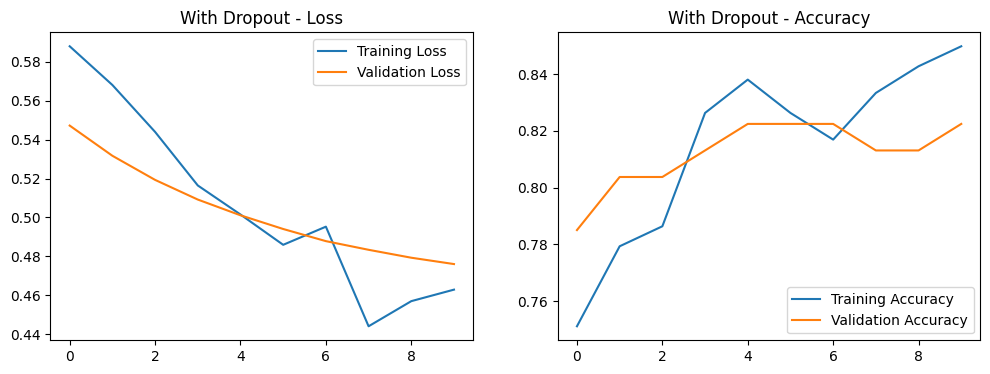

In [11]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()
    plt.show()

plot_history(history_no_dropout, "No Dropout")
plot_history(history_dropout, "With Dropout")

In [ ]:
print("M" \
"odel\t\tTest Accuracy\tTest Loss")
print("No Dropout\t\t{:.4f}\t\t{:.4f}".format(test_acc_no_dropout, test_loss_no_dropout))
print("With Dropout\t{:.4f}\t\t{:.4f}".format(test_acc_dropout, test_loss_dropout))

Model		Test Accuracy	Test Loss
No Dropout		0.7836		0.7836
With Dropout	0.8806		0.8806
